Importing required Libraries


In [14]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt


In [15]:
# Image Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Directories for train, test, validation datasets
train_dir = r'D:\Datsets\Train'
val_dir = r'D:\Datsets\Val'
test_dir = r'D:\Datsets\Test'




In [18]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'  # Ensure class_mode is set to 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


In [19]:
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")


Number of classes: 2


In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pre-trained layers

In [22]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Correct number of output units
])


In [23]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [24]:
# Fit the model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

Epoch 1/5


C:\Users\mmjay\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


114/114 ━━━━━━━━━━━━━━━━━━━━ 479s 4s/step - accuracy: 0.8129 - loss: 0.4418 - val_accuracy: 0.9451 - val_loss: 0.1658
Epoch 2/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


C:\Users\mmjay\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


114/114 ━━━━━━━━━━━━━━━━━━━━ 359s 3s/step - accuracy: 0.9399 - loss: 0.1734 - val_accuracy: 0.9648 - val_loss: 0.1056
Epoch 4/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
114/114 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.9556 - loss: 0.1299 - val_accuracy: 0.9670 - val_loss: 0.1004
15/15 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.9193 - loss: 0.1821
Test accuracy: 0.9186813235282898


In [26]:


# Save model
model.save('covid19_detector_model.keras')


In [28]:
for images, labels in test_generator:
    print(f"Image shape: {images.shape}, Labels shape: {labels.shape}")
    print(labels)  # Ensure labels are categorical and match expected number of classes
    break


Image shape: (32, 224, 224, 3), Labels shape: (32, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [29]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}")

# Confusion Matrix and Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

# Classification Report
print(classification_report(y_true, y_pred))




15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.9190 - loss: 0.1717
Test accuracy: 0.9186813235282898
15/15 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step
[[ 26 102]
 [ 65 262]]
              precision    recall  f1-score   support

           0       0.29      0.20      0.24       128
           1       0.72      0.80      0.76       327

    accuracy                           0.63       455
   macro avg       0.50      0.50      0.50       455
weighted avg       0.60      0.63      0.61       455



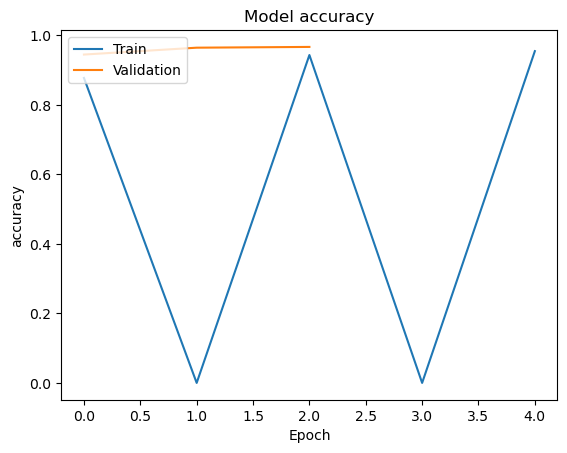

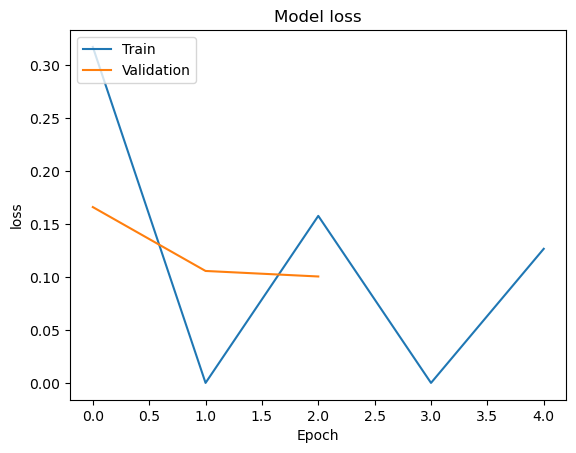

In [30]:
# Plot training/validation accuracy and loss curves
def plot_curves(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'Model {metric}')
    plt.xlabel('Epoch')
    plt.ylabel(metric)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

plot_curves(history, 'accuracy')
plot_curves(history, 'loss')


In [31]:
from flask import Flask, request, jsonify, render_template
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

app = Flask(__name__)
model = load_model('covid19_detector_model.h5')

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if 'file' not in request.files:
        return jsonify({'error': 'No file uploaded'}), 400
    
    file = request.files['file']
    if file.filename == '':
        return jsonify({'error': 'No file selected'}), 400
    
    if file and file.filename.endswith(('.png', '.jpg', '.jpeg')):
        img_path = f'uploads/{file.filename}'
        file.save(img_path)
        
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction, axis=1)[0]
        class_names = ['COVID', 'Pneumonia', 'Normal']
        result = class_names[predicted_class]
        
        os.remove(img_path)  # Remove the uploaded image after processing
        return jsonify({'prediction': result})
    else:
        return jsonify({'error': 'Invalid file format'}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\mmjay\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
